<a href="https://colab.research.google.com/github/delbempedro/nixos-config/blob/main/Copy_of_ket_weciq_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://bit.ly/ketweciq2025

![](https://api.qrserver.com/v1/create-qr-code/?format=svg&data=https://bit.ly/ketweciq2025)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/evandro-crr%2Fket-weciq-2025/HEAD?urlpath=%2Fdoc%2Ftree%2Fket_weciq_2025.ipynb)

# $\text{VIII} \left<\text{WECIQ}|\text{WCQ}\right>$

# Introduction to Quantum Programming with Ket

Ket is a programming platform designed for developing software for quantum
computers using the Python language. Its architecture is composed of three
fundamental components:

* **Ket**: The main Python library, which provides a high-level interface for
  creating quantum algorithms.
* **Libket**: The runtime library, developed in Rust with a C API. It is
  responsible for compiling quantum code and managing its execution on different
  hardware.
* **KBW**: A high-performance, noise-free (ideal) quantum simulator that enables
  the execution and testing of Ket applications on classical computers.

![](https://quantumket.org/_images/runtime.svg)

In [ ]:
!pip install ket-lang[plot] kaleido==0.2.1 -q

# Imports mathematical constants and required functions
from math import pi, sqrt
from IPython.display import display
import numpy as np
from plotly import express as px

# Imports the Ket Quantum Programming platform
from ket import *
from ket import ket_version

# Prints the Ket version being used
print("\n".join(ket_version()))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
Ket v0.9.1.5
libket v0.6.0 [rustc 1.88.0 (6b00bc388 2025-06-23) x86_64-unknown-linux-gnu]
kbw v0.4.1 [rustc 1.88.0 (6b00bc388 2025-06-23) x86_64-unknown-linux-gnu]


# 01. Quantum Process

Every quantum operation is intrinsically tied to a *process*. For the programmer,
this process primarily serves as the *source for qubit allocation*. It can be
understood as the *environment* or *context* in which quantum operations occur.

**Essential Aspects of the Quantum Process:**

* **Isolation and Independence** 🔒: Each process corresponds to an *independent
  quantum execution*, *without establishing direct communication with others*.
  This means that data and quantum states within a process are *isolated* from
  other processes, forming an autonomous domain of quantum computation.

* **Execution Management in Ket** 🖥️: In *Ket*, the process is responsible for
  *managing the entire quantum execution*, from qubit allocation to the control
  of operations.

* **Execution Target Configuration** 🎯: The process is where the *execution
  target* is configured. By default, if not specified, the target is Ket's
  quantum simulator, *KBW*. It can also be set to other targets, such as real
  quantum hardware.


## Allocating 1 Qubit

The first step in a quantum execution is to *allocate a quantum bit* (or
“qubit”) from a quantum process in Ket.

In [ ]:
# Creation of a new quantum process in Ket
process = Process()

# Allocation of a qubit from the process
qubit = process.alloc()

# Visualizes the qubit state on the Bloch sphere,
# which represents the quantum state in a three-dimensional space.
dump(qubit).sphere().show()

# Displays a mathematical representation of the qubit’s
# current quantum state, including its amplitudes and phases.
dump(qubit).show()

<IPython.core.display.Math object>

# 02. Manipulating the Qubit

To change the state of a qubit, we use *quantum logic gates*. These gates apply
transformations to the qubit's quantum state, and Ket provides a complete set of
gates for any quantum operation you may need.

➡️ You can check the full list of gates in the [Ket documentation](https://quantumket.org/ket/api/ket.gates.html).

In the example below, we apply the *Hadamard* gate (`H`) to the qubit. This gate
places it in a state of *superposition*, which means it will have an equal
probability of being in states $\left|0\right>$ or $\left|1\right>$ when
measured.

In [ ]:
# Creation of a new quantum process in Ket
process = Process()

# Allocation of a qubit from the process
qubit = process.alloc()

#####
# Application of a quantum gate to the qubit
# The Hadamard gate (H) is used to place the qubit in superposition.
#####
H(qubit)

# Visualizes the qubit state on the Bloch sphere after applying the Hadamard gate
dump(qubit).sphere().show()

# Shows a detailed representation of the qubit’s current quantum state
dump(qubit).show()

<IPython.core.display.Math object>

## Rotation Gates

Rotation gates allow you to *perform arbitrary rotations on the qubit's state*.

* `RX(θ)`: Rotates the qubit around the *X-axis* of the Bloch sphere.
* `RY(θ)`: Rotates the qubit around the *Y-axis* of the Bloch sphere.
* `RZ(θ)`: Rotates the qubit around the *Z-axis* of the Bloch sphere.

In [ ]:
process = Process()
qubit = process.alloc()

# Application of rotation gates to the qubit
# RX: Rotation around the X-axis of the Bloch sphere with an angle of π/3 radians.
RX(pi / 3, qubit)

# RY: Rotation around the Y-axis of the Bloch sphere with an angle of -π/5 radians.
RY(-pi / 5, qubit)

# RZ: Rotation around the Z-axis of the Bloch sphere with an angle of π/3 radians.
RZ(pi / 3, qubit)

dump(qubit).sphere().show()
dump(qubit).show()

<IPython.core.display.Math object>

## CNOT Gate

To generate *entanglement* and perform meaningful quantum computation, we need
gates that operate on more than one qubit. The most common of these is the CNOT
(Controlled NOT) gate.

The CNOT gate operates on *two qubits*: one control qubit and one target qubit.  
* If the control qubit is in the state $\left|1\right>$, the CNOT gate *flips
  the state of the target qubit*.  
* Otherwise, the state of the target qubit *remains unchanged*.

This behavior is essential for creating *entangled states*, such as Bell states,
which are fundamental in various quantum computing and quantum cryptography
applications.

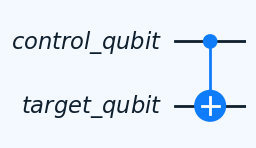

In [ ]:
# Draws the CNOT gate circuit
qulib.draw(CNOT, (1, 1))

# 03. Bell State

The Bell state is composed of two qubits. To create it, we need to allocate both
qubits in the quantum process. The `alloc(n)` method accepts an integer `n` to
specify the number of qubits to be allocated, returning them in an object of
type `Quant`.

In Ket, all quantum information and operations are “stored” and performed on
instances of `Quant`.

In [ ]:
# Creation of a new quantum process in Ket
process = Process()

# Allocation of 2 qubits within the process
qubits = process.alloc(2)

# Application of the Hadamard gate to the first qubit
# This places the first qubit in a superposed state.
H(qubits[0])

# Application of the CNOT (Controlled NOT) gate where the first qubit is the control
# and the second qubit is the target, creating entanglement between the qubits.
CNOT(qubits[0], qubits[1])

# Visualizes the distribution of the qubit states in a histogram
dump(qubits).histogram("bin").show()

# Shows a detailed representation of the qubits' quantum state
dump(qubits).show()

<IPython.core.display.Math object>

Although the Bloch sphere is excellent for *visualizing the state of a single
qubit*, it becomes impractical for multiple qubits. In such cases, we use
*histogram visualization* 📊.

The histogram represents the *distribution of the qubit states*, allowing us to
observe the probabilities of each state when performing measurements on the
quantum system.

## Exercise 1: Bell States with Ket

Implement the four Bell states using Ket.

- $\left|\Phi^+\right\rangle = \dfrac{1}{\sqrt{2}} \left( \left|00\right\rangle + \left|11\right\rangle \right)$  
- $\left|\Phi^-\right\rangle = \dfrac{1}{\sqrt{2}} \left( \left|00\right\rangle - \left|11\right\rangle \right)$  
- $\left|\Psi^+\right\rangle = \dfrac{1}{\sqrt{2}} \left( \left|01\right\rangle + \left|10\right\rangle \right)$  
- $\left|\Psi^-\right\rangle = \dfrac{1}{\sqrt{2}} \left( \left|01\right\rangle - \left|10\right\rangle \right)$


In [ ]:
# Exercise: Implementation of the four Bell states using Ket

# 04. Building the CNOT Gate

[Basic gates available in Ket](https://gitlab.com/quantum-ket/libket/-/blob/main/src/ir/gate.rs?ref_type=heads#L91)

The CNOT gate can be constructed from the *Pauli X* gate using a *controlled
call*.

In the code below, the function `my_cnot` accepts a `Quant` with two qubits.
Inside it, `with control(qubits[0])` defines the first qubit as the *control*.
This means that if the control qubit is in the state $\left|1\right>$, the
*Pauli X* gate will be applied to the second qubit, flipping its state.

This approach demonstrates how we can build complex quantum gates from simpler
operations by leveraging the power of *controlled operations*.

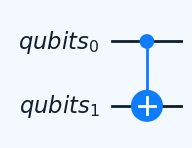

In [ ]:
# Defining a function for the CNOT gate
def my_cnot(qubits):
    # Defines the first qubit as the control qubit
    with control(qubits[0]):
        # Applies the Pauli X gate to the second qubit if the control is in |1⟩
        X(qubits[1])


# Draws the circuit for the CNOT gate
qulib.draw(my_cnot, 2)

In [ ]:
process = Process()
qubits = process.alloc(2)

H(qubits[0])

# Application of the previously constructed CNOT gate
my_cnot(qubits)

dump(qubits).show()

<IPython.core.display.Math object>

## Controlled Gate with `ctrl`

The `ctrl` function simplifies the application of controlled quantum operations,
allowing you to *add control qubits directly in the gate call*.  
This makes the code more concise.

For example, in the code below, we apply the *Pauli X* gate to the second qubit,
using the first qubit as the *control*:

In [ ]:
process = Process()
qubits = process.alloc(2)

H(qubits[0])

# Application of the Pauli X gate to the second qubit, controlled by the first qubit
ctrl(qubits[0], X)(qubits[1])  # Applies X to qubit 1 if qubit 0 is in |1⟩

dump(qubits).show()

<IPython.core.display.Math object>

# 06. Any Function Can Be a Quantum Gate

In Ket, *any function that applies quantum logic gates* is itself considered a
*new quantum gate*. This allows the construction of *complex quantum operations*
by sequentially combining simpler gates.

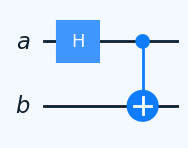

In [ ]:
# Defining a function to create a Bell state
def bell(a, b):
    # Applies the Hadamard gate to qubit 'a'
    H(a)
    # Applies the CNOT gate, where 'a' is the control and 'b' is the target
    CNOT(a, b)


# Draws the circuit for the 'bell' gate
qulib.draw(bell, (1, 1))


In [ ]:
process = Process()
qubits = process.alloc(2)

# Creation of the Bell state using the previously defined function
bell(qubits[0], qubits[1])

dump(qubits).histogram().show()
dump(qubits).show()

<IPython.core.display.Math object>

In [ ]:
process = Process()

# Allocation of 3 qubits within the process
qubits = process.alloc(3)

# Application of the Hadamard gate to the first qubit
H(qubits[0])

# Application of the bell function controlled by the first qubit
# Creates a Bell state between qubits 1 and 2 if qubit 0 is in |1⟩
ctrl(qubits[0], bell)(qubits[1], qubits[2])

dump(qubits).histogram("bin").show()
dump(qubits).show()

<IPython.core.display.Math object>

# 07. Quantum Gate Manipulation

In Ket, you can *manipulate quantum gates* in several ways, building circuits
more flexibly. The main operations are concatenation and tensor product:

- **Gate Concatenation**: You can *chain quantum operations*, applying one gate
  after another. This is great for building sequences that act on the same
  qubits. Remember, the *order of the gates* is crucial for the final result.

- **Tensor Product**: The tensor product allows you to *combine quantum gates
  that act on different qubits*. This operation is essential for creating
  circuits that operate on multiple qubits independently.

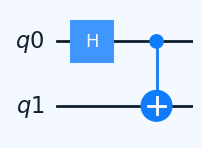

In [ ]:
# Creation of the Bell gate using concatenation of operations
# H applied to qubit 'a' and CNOT with 'a' as control and 'b' as target
bell_2 = cat(kron(H, I), CNOT)

qulib.draw(bell_2, (1, 1))

In [ ]:
process = Process()

# Allocation of 2 qubits within the process
a, b = process.alloc(2)

# Application of the Bell gate to the allocated qubits
bell_2(a, b)

dump(a + b).histogram().show()
dump(a + b).show()

<IPython.core.display.Math object>

## Exercise 2: GHZ State

Use the `ctrl` function to implement a quantum gate that prepares the GHZ state
of $n$ qubits starting from the state $\left|0\right\rangle^{\otimes n}$.

The GHZ state is defined as:

$$
\begin{aligned}
\left|\text{GHZ}\right\rangle &= \frac{1}{\sqrt{2}}\left(\left|0\right\rangle^{\otimes n} + \left|1\right\rangle^{\otimes n}\right) \\
&= \frac{1}{\sqrt{2}}\left(\left|0\right\rangle \otimes \left|0\right\rangle \otimes \cdots \otimes \left|0\right\rangle + \left|1\right\rangle \otimes \left|1\right\rangle \otimes \cdots \otimes \left|1\right\rangle\right)
\end{aligned}
$$


In [ ]:
# Exercise 2: GHZ
p = Process()

qubits = p.alloc(20)

H(qubits[0])

ctrl(qubits[0], qulib.prepare.ghz)(qubits[1:])

dump(qubits).show()

<IPython.core.display.Math object>

# 08. Adding Global Phase

Not every controlled gate with a target qubit can be directly constructed from
controlled calls of basic gates in Ket. This is due to the *global phase*.

Consider the gate $\sqrt{X}$:

$$
\sqrt{X}\left|0\right> = \frac{1}{2} \left((1+i)\left|0\right> + (1-i)\left|1\right>\right)
$$
$$
\sqrt{X}\left|1\right> = \frac{1}{2} \left((1-i)\left|0\right> + (1+i)\left|1\right>\right)
$$

It can be equivalent to the rotation gate $R_X(\pi/2)$ for a single qubit, since
both alter the state similarly up to a global phase. However, a crucial
difference arises when these gates are *called in a controlled manner*. The
global phase, which was irrelevant for a single qubit, becomes a *relative
phase* when dealing with control qubits, impacting quantum behavior.

Although we can represent the gate $\sqrt{X}$ as $R_X(\pi/2)$ for a qubit:

$$
\underbrace{\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & -i \\ -i & 1 \end{bmatrix}}_{R_X(\pi/2)}
\times
\underbrace{ e^{i\tfrac{\pi}{4}}}_{\text{Global Phase}}
=
\frac{1}{2} \begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i \end{bmatrix}
=
\sqrt{X}
$$

When considering the controlled version of $R_X(\pi/2)$, the global phase alters
the behavior in a two-qubit system:

$$
\underbrace{\frac{1}{\sqrt{2}}
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0 \\
0 & \sqrt{2} & 0 & 0 \\
0 & 0 & 1 & -i \\
0 & 0 & -i & 1
\end{bmatrix}}_{CR_X(\pi/2)}
\times
\underbrace{ e^{i\tfrac{\pi}{4}}}_{\text{Global Phase}}
\not=
\frac{1}{2}
\begin{bmatrix}
2 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 1+i & 1-i \\
0 & 0 & 1-i & 1+i
\end{bmatrix}
=
C\sqrt{X}
$$

Therefore, to implement the gate $C\sqrt{X}$ correctly, the global phase must be
handled precisely. Fortunately, Ket supports the *explicit addition of global
phases* to quantum gates using the `@global_phase` decorator. This allows us to
construct gates like `SX` $= \sqrt{X}$.

In [ ]:
# Defining the SX gate as RX(pi/2) with a global phase of pi/4
@global_phase(pi / 4)
def my_sx(qubit):
    RX(pi / 2, qubit)


# Displaying the corresponding matrix of the minha_sx gate
print(np.array(qulib.dump_matrix(my_sx)))
qulib.draw(my_sx, 1)


In [ ]:
# Creating the controlled version of the `minha_sx` gate for two qubits
def my_csx(qubits):
    ctrl(qubits[:-1], my_sx)(qubits[-1])


num_qubits = 2

print(np.array(qulib.dump_matrix(my_csx, num_qubits)))
qulib.draw(my_csx, num_qubits)

# 09. Inverse Operation

In quantum computing, all operations are *unitary*, meaning they are
*reversible*. This implies that we can always apply the inverse of any quantum
operation. In Ket, the `adj()` function allows us to do exactly that by applying
the *inverse operation* of a gate.

In [ ]:
def bell(qubits):
    ctrl(H(qubits[0]), X)(qubits[1])


# Drawing the Bell circuit
qulib.draw(bell, 2)

In [ ]:
bell_inv = adj(bell)

# Drawing the inverse Bell circuit
qulib.draw(bell_inv, 2)

In [ ]:
qulib.draw(QFT, 4)

In [ ]:
qulib.draw(adj(QFT), 4)

# 10. The `with around()` Construction

In quantum computing, it is common to “sandwich” a quantum gate between two
others. This means applying a gate $U$ before and after another gate $V$,
forming the composite operation $U^\dagger VU$.

A practical example is the implementation of the $R_{XX}$ gate, widely used in
variational quantum algorithms. The $R_{XX}$ gate performs a joint rotation of
two qubits along the $X$ axis.

Below, we will implement two versions of the $R_{XX}$ gate: one without and one
using the `with around()` construction.

In [ ]:
def my_rxx_v1(angle: float, qubits):
    H(qubits)
    CNOT(qubits[0], qubits[1])
    RZ(angle, qubits[1])
    CNOT(qubits[0], qubits[1])
    H(qubits)


angle = pi / 4

qulib.draw(my_rxx_v1, 2, (angle,))

In [ ]:
p = Process()
qubits = p.alloc(2)
my_rxx_v1(angle, qubits)

dump(qubits).histogram().show()

In [ ]:
def my_rxx_v2(angle: float, qubits):
    with around(cat(kron(H, H), CNOT), *qubits):
        RZ(angle, qubits[1])


qulib.draw(my_rxx_v2, 2, (angle,))

In [ ]:
p = Process()
qubits = p.alloc(2)
my_rxx_v2(angle, qubits)

dump(qubits).histogram().show()

Both implementations result in the same number of gates applied to the qubits.
However, the `with around()` construction allows you to *reduce the amount of
code*, expressing this behavior more concisely.

## SWAP Gate

We can build the SWAP gate using *three CNOT gates*.

In [ ]:
def my_swap_v1(qubits):
    CNOT(qubits[0], qubits[1])
    CNOT(qubits[1], qubits[0])
    CNOT(qubits[0], qubits[1])


qulib.draw(my_swap_v1, 2)

In [ ]:
def my_swap_v2(qubits):
    with around(CNOT, *qubits):
        CNOT(qubits[1], qubits[0])


qulib.draw(my_swap_v2, 2)

## Fredkin Gate

The Fredkin gate is essentially the *controlled version of the SWAP gate*.  
In Ket, we can easily create the Fredkin gate by adding a control qubit to an existing SWAP gate.

We can implement the Fredkin gate using any of the SWAP gate versions we built earlier.  
Both produce the same behavior, but the implementation that uses `with around()` may offer greater *execution efficiency*.

![Fredkin Gate](https://upload.wikimedia.org/wikipedia/commons/9/98/Qcircuit_Fredkin.svg)

In [ ]:
def fredkin_v1(qubits):
    with control(qubits[0]):
        my_swap_v1(qubits[1:3])


qulib.draw(fredkin_v1, 3)

In [ ]:
def fredkin_v2(qubits):
    with control(qubits[0]):
        my_swap_v2(qubits[1:3])


qulib.draw(fredkin_v2, 3)

# 11. Measurement

Measurement is the *only way to extract information* from a quantum program.

It is important to note that the `dump` operations we have used so far work *only in simulation*.

The `measure` function measures a list of qubits and returns an unsigned integer corresponding to the *measured bitstring*.  
This function is essential for obtaining concrete information about the quantum state after the execution of operations.

In [ ]:
p = Process()
qubits = p.alloc(2)

# Applying the Hadamard gate to the qubits
H(qubits)

# Visualizing the state of the qubits before measurement
dump(qubits).histogram(title="Before measurement").show()
display(dump(qubits).show())

# Measuring the state of the first qubit
resultado = measure(qubits[0])
print(resultado.get())

# Visualizing the state of the qubits after measurement
dump(qubits).histogram(title="After measurement").show()
display(dump(qubits).show())

In [ ]:
p = Process()
qubits = p.alloc(2)

# Prepares the Bell state
ctrl(H(qubits[0]), X)(qubits[1])

# Visualizing the state of the qubits before measurement
dump(qubits).histogram("bin", title="Before measurement").show()
display(dump(qubits).show())

# Measuring the state of the first qubit
resultado = measure(qubits[0])
print("Measurement result:", resultado.get())

# Visualizing the state of the qubits after measurement
dump(qubits).histogram("bin", title="After measurement").show()
display(dump(qubits).show())

## Exercise 3: Measurements in Other Bases

Quantum computers normally perform measurements only in the **computational basis** (Z basis). However, by applying certain operations before measurement, it is possible to measure qubits in other bases.

In this exercise, implement functions that measure qubits in the **X basis** and **Y basis**.


### **Measurements in the X Basis (Hadamard Basis)**

In the X basis, also known as the Hadamard basis, measurement of a qubit in the state

$$
\frac{1}{\sqrt{2}}(\left|0\right> + \left|1\right>)
$$

returns 0, while measurement of the state

$$
\frac{1}{\sqrt{2}}(\left|0\right> - \left|1\right>)
$$

returns 1.


### **Measurements in the Y Basis**

In the Y basis, measurement of a qubit in the state

$$
\frac{1}{\sqrt{2}}(\left|0\right> + i\left|1\right>)
$$

returns 0, and measurement of the state

$$
\frac{1}{\sqrt{2}}(\left|0\right> - i\left|1\right>)
$$

returns 1.


In [ ]:
# Exercise: Measurements in Other Bases

## Exercise 4: Quantum Teleportation

Implement the *quantum teleportation protocol* using Ket. Your implementation
should follow the steps described below:

Quantum teleportation is a protocol that allows the *transfer of quantum
information* from one qubit to another without physically moving the original
qubit. This is possible using a quantum channel (entangled qubits) and two
classical channels for communication.

The process involves two parties: *Alice*, who possesses the qubit to be
teleported, and *Bob*, who will receive it. For quantum teleportation, a *Bell
state* is initially shared between Alice and Bob. One of the most common Bell
states is:

$$\left| \Phi^+ \right> = \frac{1}{\sqrt{2}} \left( \left|00\right> + \left|11\right> \right)$$

In this state, Alice's and Bob's qubits are *entangled*, allowing the transfer
of information from Alice to Bob. The protocol involves measurements and the
transmission of classical results, which allows Bob to recover Alice's original
state.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/Quantum_teleportation_circuit.svg" alt="teleportation" width="500"/>

**Your implementation should include the following steps:**

1. **Bell State Preparation**: Allocate the necessary qubits and prepare the
   Bell state shared between Alice and Bob.
2. **Application of Quantum Gates**: Perform the quantum operations necessary
   to entangle the qubit to be teleported with the Bell state.
3. **Measurement**: Measure Alice's qubits.
4. **Correction**: Send the measurement results to Bob and apply the necessary
   corrections on his qubit to recover the original state.


In [ ]:
# Exercise: Quantum Teleportation

# 12. Sampling

In many quantum algorithms, the outcome is not limited to a single measurement,
but rather a sequence of measurements that help build a probability distribution
of possible quantum states. To facilitate this process, the Ket library provides
the `sample()` function, which measures a list of qubits multiple times,
allowing you to collect representative samples of the quantum state.

In [ ]:
p = Process()
qubits = p.alloc(2)

# Applying the Hadamard gate to the qubits to create superposition
H(qubits)

# Collecting samples from the qubits
result = sample(qubits, shots=1000)

# Printing the measurement results
print(result.get())

# Displaying the histogram of the measured results
result.histogram("bin")

In [ ]:
p = Process()
qubits = p.alloc(2)
ctrl(H(qubits[0]), X)(qubits[1])

result = sample(qubits)

print(result.get())
result.histogram("bin")

# 13. Expectation Value Calculation

Ket allows the calculation of the *expectation value* of Hamiltonians formed by
Pauli operators, which is fundamental in many quantum applications. The
expectation value of an operator $O$ in a quantum state $\left|\psi\right>$ is
given by:

$$
\left< O \right> = \left< \psi | O | \psi \right>
$$

This formula measures the expected outcome of a measurement associated with
operator $O$ when the system is in state $\left|\psi\right>$.


## Visualizing on the Bloch Sphere with Expectation Values

We can use the *expectation values* of the Pauli operators ($X$, $Y$, and $Z$)
of a qubit to calculate its position on the *Bloch sphere*. The relationship
between the expectation values and the coordinates $(x, y, z)$ on the sphere is:

* $x = \left< X \right>$
* $y = \left< Y \right>$
* $z = \left< Z \right>$

These coordinates allow us to *visualize the qubit's position* on the Bloch
sphere, providing a geometric representation of its quantum state.

In [ ]:
process = Process()
qubit = process.alloc()

# Applying rotations to set the qubit's state
RX(-pi / 5, qubit)
RZ(-pi / 5, qubit)

# Visualizing the qubit's state on the Bloch sphere
dump(qubit).sphere().show()

# Define the operators
with obs():
    x = X(qubit)
    y = Y(qubit)
    z = Z(qubit)

# Calculating expectation values
exp_x = exp_value(x).get()
exp_y = exp_value(y).get()
exp_z = exp_value(z).get()

# Calculating the position on the Bloch sphere
print(f"Position on the Bloch sphere: ({exp_x}, {exp_y}, {exp_z})")

# 14. Max-Cut with FALQON

The *Feedback-based ALgorithm for Quantum OptimizatioN (FALQON)* is a
variational quantum algorithm for solving *optimization problems*. It is
especially used to find approximate solutions to *NP-hard* problems, such as
the *Max-Cut* problem.

The Max-Cut problem consists of dividing a graph into two parts, maximizing
the number of edges between them. Think of it as finding the best way to
partition a set of vertices to optimize the connections between the two subsets.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/Max-cut.svg" alt="Max-Cut" width="500"/>

## FALQON

![](https://ar5iv.labs.arxiv.org/html/2103.08619/assets/Concept4.png)


$$
H_p = -\sum_{a, b\,\in\, \mathcal{V}}\frac{1}{2}(1-Z_aZ_b)
$$


In [ ]:
def cost_h(edges, qubits):
    with obs():
        return -1 / 2 * sum(1 - Z(qubits[a]) * Z(qubits[b]) for a, b in edges)


$$
H_d = \sum_j X_j
$$


In [ ]:
def mixer_h(qubits):
    with obs():
        return sum(X(q) for q in qubits)

$$
\beta = - i[H_d, H_p]
$$

In [ ]:
def beta_h(edges, qubits):
    h = 1j * commutator(mixer_h(qubits), cost_h(edges, qubits))
    return -h

[![](https://mermaid.ink/img/pako:eNqdk8FrwyAUxv8VeYXRQihRk5gIPa3sttN2Gl6kMW2o0WINW1f6vy8mLWkH28qeF7_3ft-nHjzCypYKOFTavq820nn0uhQGdRVPpwJiAbMZWiwWCAeJe_mASBAkiIHFPUK6CQ0TOk5IP0lCNxm7dOgKM8i9P2iFYlTVWvNJ3Fe0sto6PnnqK9p7Z7eKT1ga1rUNo8vsbBxSBt81SNBt5M1pP-fT_10r-ftaujbbl_PTL_AyHWFjjfpOkrtJejeZ3E2mv5BhQQRrV5fAvWtVBI1yjQwSjiFJgN-oRgng3bZUlWy1FyDMqbPtpHmztrk4nW3XG-CV1PtOtbtSerWs5drJEVGmVO7RtsYDx6SPAH6ED-AsnxNaFGnBcMaKLM8jOHQMTeckzShmmOYZw3l-iuCzPzSeMxqnFGPGOg8ljEagytpb9zx8j_6XnL4AkdHr-g?type=png)](https://mermaid.live/edit#pako:eNqdk8FrwyAUxv8VeYXRQihRk5gIPa3sttN2Gl6kMW2o0WINW1f6vy8mLWkH28qeF7_3ft-nHjzCypYKOFTavq820nn0uhQGdRVPpwJiAbMZWiwWCAeJe_mASBAkiIHFPUK6CQ0TOk5IP0lCNxm7dOgKM8i9P2iFYlTVWvNJ3Fe0sto6PnnqK9p7Z7eKT1ga1rUNo8vsbBxSBt81SNBt5M1pP-fT_10r-ftaujbbl_PTL_AyHWFjjfpOkrtJejeZ3E2mv5BhQQRrV5fAvWtVBI1yjQwSjiFJgN-oRgng3bZUlWy1FyDMqbPtpHmztrk4nW3XG-CV1PtOtbtSerWs5drJEVGmVO7RtsYDx6SPAH6ED-AsnxNaFGnBcMaKLM8jOHQMTeckzShmmOYZw3l-iuCzPzSeMxqnFGPGOg8ljEagytpb9zx8j_6XnL4AkdHr-g)
[![](https://mermaid.ink/img/pako:eNqNk8FvwiAUxv8V8kwWTRpToC0tiaeZ3XbaTksvxFJtbMEgzeaM__sK1bSazfm48L33-z7gwBFWupDAoaz152ojjEXvy1yhrsLpNIcwh9kMLRYLhJ3EXj4h4gRxomexR0g3oW5Chwnxk8h1o6FL-26uerm3h1qiEJVVXfPJi69gpWtt-CT0Feyt0Vt5kWMbRtezYJwyBgk6R54P6LmbfBa7NbZRdAVeZ_xti_6_Vl2p7dv56b_BSit5Sw6vXcb3SfIwSR8mo4fJ-A7pFgSwNlUB3JpWBtBI0wgn4eiScrAb2cgceLctZCna2uaQq1Nn2wn1oXVzcRrdrjfAS1HvO9XuCmHlshJrIwZEqkKaZ90qCzzzCcCP8AWcpXNCsyzOGE5YlqRpAAfgmMZzEicUM0zThOE0PQXw7c8M54yGMcWYsc5DCaMByKKy2rz2_8h_p9MPkMj4-A?type=png)](https://mermaid.live/edit#pako:eNqNk8FvwiAUxv8V8kwWTRpToC0tiaeZ3XbaTksvxFJtbMEgzeaM__sK1bSazfm48L33-z7gwBFWupDAoaz152ojjEXvy1yhrsLpNIcwh9kMLRYLhJ3EXj4h4gRxomexR0g3oW5Chwnxk8h1o6FL-26uerm3h1qiEJVVXfPJi69gpWtt-CT0Feyt0Vt5kWMbRtezYJwyBgk6R54P6LmbfBa7NbZRdAVeZ_xti_6_Vl2p7dv56b_BSit5Sw6vXcb3SfIwSR8mo4fJ-A7pFgSwNlUB3JpWBtBI0wgn4eiScrAb2cgceLctZCna2uaQq1Nn2wn1oXVzcRrdrjfAS1HvO9XuCmHlshJrIwZEqkKaZ90qCzzzCcCP8AWcpXNCsyzOGE5YlqRpAAfgmMZzEicUM0zThOE0PQXw7c8M54yGMcWYsc5DCaMByKKy2rz2_8h_p9MPkMj4-A)

In [ ]:
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]

process = Process()
qubits = process.alloc(5)
h = beta_h(edges, qubits)
print(h)

$$
\begin{align}
U_p &= e^{-iH_p\Delta t}\\
U_d(\beta) &= e^{-iH_d\Delta t\beta}
\end{align}
$$

In [ ]:
def falqon_layer(edges, delta_t, beta, qubits):
    evolve(delta_t * cost_h(edges, qubits))
    evolve(delta_t * beta * mixer_h(qubits))


qulib.draw(falqon_layer, 5, (edges, 0.1, 1.53))

In [ ]:
def falqon(edges, delta_t, num_qubits, num_layers):
    betas = [0.0]
    cost = []

    # Create a new process for dynamic execution
    process = Process()
    qubits = process.alloc(num_qubits)
    H(qubits)

    for _ in range(num_layers):
        # Apply a FALQON layer
        falqon_layer(edges, delta_t, betas[-1], qubits)

        cost.append(exp_value(cost_h(edges, qubits)).get())
        betas.append(exp_value(beta_h(edges, qubits)).get())

    dump(qubits).histogram("bin").show()

    # Plot cost and beta
    px.line(x=list(range(len(cost))), y=cost, title="Cost").show()
    px.line(x=list(range(len(betas))), y=betas, title="Beta").show()


falqon(edges, delta_t=0.1, num_qubits=5, num_layers=10)

----------

# 🌐 Access the Ket Documentation https://quantumket.org